In [1]:
from scipy.sparse import csr_matrix
import numpy as np

# global vars

n = 81 # n_States
a = 4 # n_actions
gamma = 0.99 # discount factor

with open('prob_a1.txt', 'r') as f:
    prob_a1 = f.read().splitlines()
    
with open('prob_a2.txt', 'r') as f:
    prob_a2 = f.read().splitlines()

with open('prob_a3.txt', 'r') as f:
    prob_a3 = f.read().splitlines()

with open('prob_a4.txt', 'r') as f:
    prob_a4 = f.read().splitlines()
    
with open('rewards.txt', 'r') as f:
    rewards = [float(i) for i in f.read().splitlines()]

def sparse_mat(lines):
    rows = []
    columns = []
    data = []
    for line in lines:
        a = line.split()
        rows.append(int(a[0])-1)
        columns.append(int(a[1])-1)
        data.append(float(a[2]))
    
    return csr_matrix((data,(rows,columns)), shape=(n,n))
    
prob_a1 = sparse_mat(prob_a1).toarray()
prob_a2 = sparse_mat(prob_a2).toarray()
prob_a3 = sparse_mat(prob_a3).toarray()
prob_a4 = sparse_mat(prob_a4).toarray()

prob_ar = [prob_a1, prob_a2, prob_a3, prob_a4]
# sum check 
# summs = []
# for i in range(n):
#     s = sum(mat[i,:])
#     summs.append(s)
    
# summs
# len(rewards)
# prob_a1

In [2]:
def state_value_function(P):
    I = np.identity(n)
    inverse = np.linalg.inv(I - gamma*P)
    return np.matmul(inverse,rewards)

def P_mat(policy):
    p = []
    for i in range(n):
        my_prob = prob_ar[policy[i]]
        p.append(my_prob[i,:])
    return np.array(p)

def greedy_policy(policy,svfn):
    new_policy = []
    for j in range(n): # for all states
        val = []
        for i in range(a): # compute value for all actions
            my_prob = prob_ar[i]
            val.append(my_prob[j,:].dot(svfn))
        new_policy.append(np.argmax(val))

    return new_policy

def policy_iteration(policy):
    ppi = P_mat(policy)
    svfn = state_value_function(ppi)
    svfnNew = np.array([0]*n)
    while(sum(svfnNew-svfn) != 0):
        svfn = svfnNew
        policy = greedy_policy(policy,svfn) # see arguments
        ppinew = P_mat(policy)
        svfnNew = state_value_function(ppinew)
    
    return (svfnNew, policy)

policy = [0]*n

s = policy_iteration(policy)
svfn = s[0]
opt_policy = s[1]

svfn = np.array(svfn)
svfn = svfn.reshape(9,9)
svfn.shape


(9, 9)

[[   0.            0.            0.            0.            0.
     0.            0.            0.            0.        ]
 [   0.           65.77308407   67.13647421   77.84605      79.84451583
    72.47511769 -100.            0.          100.        ]
 [   0.           55.88294346 -100.           70.30818136   81.34440225
    83.04847989   84.88054612   96.87232244   98.71875987]
 [   0.           54.92298013   50.47656297   59.66641187    0.
    80.95826449    0.           97.04482865   98.72729893]
 [  53.50968756   54.14557214    0.         -100.         -100.
    61.77980767 -100.           88.22035599  100.        ]
 [   0.           52.50402036   43.9359876    51.09137525   61.00715483
    71.78642614   73.94661407   85.18458536   97.57257319]
 [   0.           43.77254574 -100.            0.            0.
    70.35142939    0.         -100.           88.40593622]
 [   0.           47.95296148   48.76871928   58.14735126   59.39003194
    60.1688947  -100.            0.        

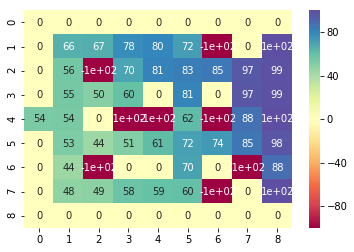

In [6]:
import seaborn as sns

ax = sns.heatmap(np.transpose(svfn), annot=True,cmap= 'Spectral')

print(np.transpose(svfn))


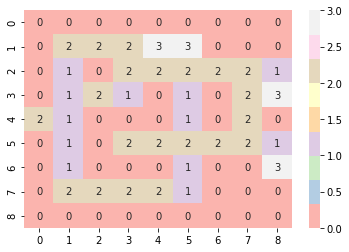

In [67]:
# annotation = []
# dictan = {0:'left', 1:'up', 2:'right',3:'down'}

# for i in opt_policy:
#     annotation.append(dictan[i])

opt_policy = np.array(opt_policy)
# annotation = np.array(annotation)
# an = annotation.reshape(9,9)

op = opt_policy.reshape(9,9)

ax = sns.heatmap(np.transpose(op), annot = True, cmap = 'Pastel1')


No. of iterations to converge:   count
[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.          65.46262337  66.82362731  77.49007147  79.4838449
   72.15083766 -99.58199541   0.          99.58199541]
 [  0.          55.61304813 -99.58199541  69.98884212  80.98131466
   82.68267671  84.51186332  96.45719452  98.30091441]
 [  0.          54.65479617  50.23721306  59.39009016   0.
   80.59717604   0.          96.62945385  98.30944112]
 [ 53.24176284  53.87764742   0.         -99.58199541 -99.58199541
   61.49886963 -99.58199541  87.84694546  99.58199541]
 [  0.          52.24050265  43.70986963  50.85693044  60.73384082
   71.4701599   73.62560239  84.81982299  97.15970085]
 [  0.          43.54654747 -99.58199541   0.           0.
   70.03755535   0.         -99.58199541  88.03220222]
 [  0.          47.72079085  48.53618558  57.87652924  59.11695767
   59.89568795 -99.58199541   0.          99.58199541]
 [  0.    

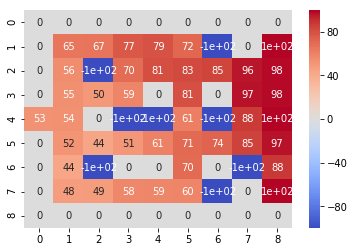

In [7]:
# value iteration
import numpy as np
import seaborn as sns

gamma = 0.99
n = 81
def ValueIter(svfn):
    new_svfn = []
    for s in range(n):
        myprobs = []
        for prob in prob_ar:
            myprobs.append(np.sum(prob[s,:].dot(svfn)))
        new_svfn.append(rewards[s] + gamma*np.max(myprobs))
        
    return np.array(new_svfn)

count = 0
svfn = np.array([0.1]*n)
new_svfn = np.array([0]*n)
while(abs(np.sum(new_svfn - svfn)) > 0.1 or count == 0):
    svfn = new_svfn
    new_svfn = ValueIter(svfn)
    count +=1

svfn = new_svfn.reshape(9,9)
print('No. of iterations to converge: ', ' count')

print(np.transpose(svfn))
ax = sns.heatmap(np.transpose(svfn), annot=True,cmap= 'coolwarm')